In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('student_exam_data.csv')

In [4]:
df.head(5)

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [11]:
df.columns

Index(['Study Hours', 'Previous Exam Score', 'Pass/Fail'], dtype='object')

In [12]:
# Fit linear model
model = LinearRegression()
model.fit(df[['Study Hours']], df[['Pass/Fail']])

LinearRegression()

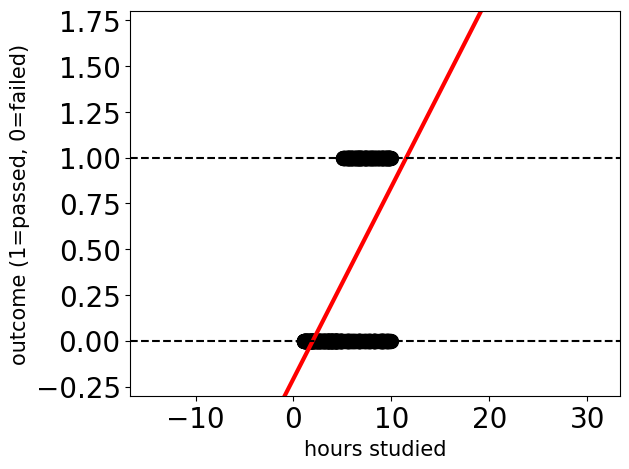

In [15]:
# Get predictions from linear model
sample_x = np.linspace(-16.65, 33.35, 300).reshape(-1, 1)
predictions = model.predict(sample_x)

# plot the data
plt.scatter(x= 'Study Hours', y = 'Pass/Fail', data = df, color='black', s=100)

# plot the line
plt.plot(sample_x, predictions, color='red', linewidth=3)

# Customization for readability 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

# label plot and set limits
plt.ylabel('outcome (1=passed, 0=failed)', fontsize=15)
plt.xlabel('hours studied', fontsize=15)
plt.xlim(-16.65, 33.35)
plt.ylim(-.3, 1.8)

# show the plot
plt.tight_layout()
plt.show()

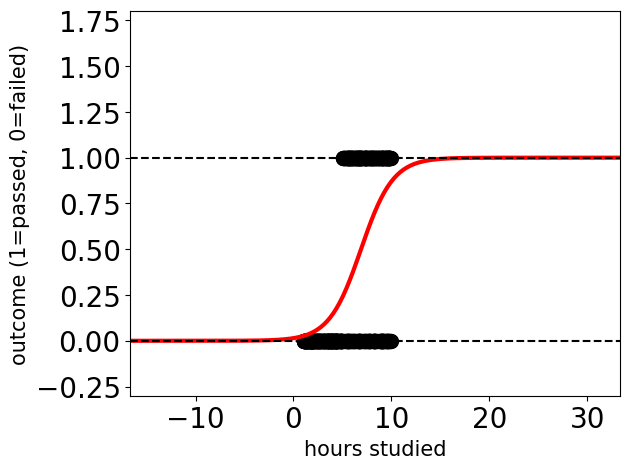

In [21]:
five_hour_studier = 0.06

hours_studied = df[['Study Hours']]
passed_exam = df[['Pass/Fail']]
model = LogisticRegression()
model.fit(x, y)

# Get predictions from linear model
sample_x = np.linspace(-16.65, 33.35, 300).reshape(-1, 1)
predictions = model.predict_proba(sample_x)[:, 1]

# plot the data
plt.scatter(x= 'Study Hours', y = 'Pass/Fail', data = df, color='black', s=100)

# plot the line
plt.plot(sample_x, predictions, color='red', linewidth=3)

# Customization for readability 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

# label plot and set limits
plt.ylabel('outcome (1=passed, 0=failed)', fontsize=15)
plt.xlabel('hours studied', fontsize=15)
plt.xlim(-16.65, 33.35)
plt.ylim(-.3, 1.8)

# show the plot
plt.tight_layout()
plt.show()

In [22]:
intercept = model.intercept_
coef = model.coef_

# calculate log_odds

log_odds = intercept + coef * hours_studied 
print(log_odds)

     Study Hours
0      -1.550057
1       1.628648
2       0.421986
3      -0.313615
4      -2.755622
..           ...
495    -1.666949
496    -0.396382
497    -3.187508
498     1.759291
499     1.824478

[500 rows x 1 columns]


In [25]:
x = df[[ 'Study Hours', 'Previous Exam Score']]
y = df['Pass/Fail']  # Corrected to select only the 'Pass/Fail' column as a 1D array

# Transform X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# split data into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 27)  # Corrected the order of variables

# create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression
cc_lr = LogisticRegression()
cc_lr.fit(x_train, y_train)

print(cc_lr.intercept_)
print(cc_lr.coef_)

# print the predicted outcomes for the test data
print(cc_lr.predict(x_test))
# print the predicted probabilitas for test data
print(cc_lr.predict_proba(x_test)[:, 1])
# print the true outcomes for the test data
print(y_test)

[-1.43085993]
[[2.75911538 1.99833288]]
[0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0
 1 0 0 1 1 0 1 1 0 0 0 0 0 1]
[1.13325307e-03 1.51549116e-02 7.85640181e-01 4.67613789e-01
 2.71507845e-03 1.59784212e-02 2.91354480e-01 9.98073469e-01
 9.04149595e-04 8.53310642e-03 4.34743792e-04 6.40736673e-04
 3.81587803e-03 8.17861970e-01 9.18121637e-01 9.77170740e-01
 5.85446224e-02 7.83477973e-01 6.90825010e-02 1.85932532e-02
 3.39343679e-02 2.85483175e-01 6.51337759e-01 8.17386958e-04
 3.41025303e-01 2.02029895e-02 8.79909004e-03 1.38389080e-02
 5.56865895e-01 3.07833061e-04 5.07156060e-02 1.51072138e-02
 9.43978516e-01 6.65790131e-03 9.67062492e-01 3.01392984e-02
 1.28942124e-01 5.93334976e-01 6.64792778e-01 2.16810997e-01
 1.22198053e-03 3.28737423e-02 7.84863086e-01 8.60541448e-01
 9.73098569e-01 9.44984372e-01 9.9

In [27]:
from sklearn.metrics import confusion_matrix
y_pred = cc_lr.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[68  9]
 [ 7 41]]


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.872
0.82
0.8541666666666666
0.8367346938775511
